In [1]:
install.packages("TeachingDemos")

package 'TeachingDemos' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\12482\AppData\Local\Temp\RtmpKMrcnc\downloaded_packages


In [2]:
library(TeachingDemos) 
library(dplyr)
df <- read.csv("data.csv", header=TRUE, stringsAsFactors=FALSE)

Warning message:
"package 'TeachingDemos' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
str(df)

'data.frame':	41710 obs. of  24 variables:
 $ ï..playerID: chr  "aardsda01" "aardsda01" "aardsda01" "aardsda01" ...
 $ yearID     : int  2004 2006 2007 2008 2009 2010 2012 2013 2015 1990 ...
 $ stint      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID     : chr  "SFN" "CHN" "CHA" "BOS" ...
 $ lgID       : chr  "NL" "NL" "AL" "AL" ...
 $ G          : int  11 45 25 47 73 53 1 43 33 32 ...
 $ G_batting  : logi  NA NA NA NA NA NA ...
 $ AB         : int  0 2 0 1 0 0 0 0 1 0 ...
 $ R          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X2B        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X3B        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HR         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RBI        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SB         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CS         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BB         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SO         : int  0 0 0 1 0 0 0 0 1 0 ...
 $ IBB        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HBP        : int  0 0 0 0 0 0

In [4]:
df = df[which(df$stint ==1), ]   

In [5]:
df = df %>% group_by(ï..playerID)

In [6]:
df$BattingAvg = df$H/df$AB

In [7]:
df = df[which(df$BattingAvg >=.001), ]   

In [8]:
df = df[which(df$G >=100), ]   

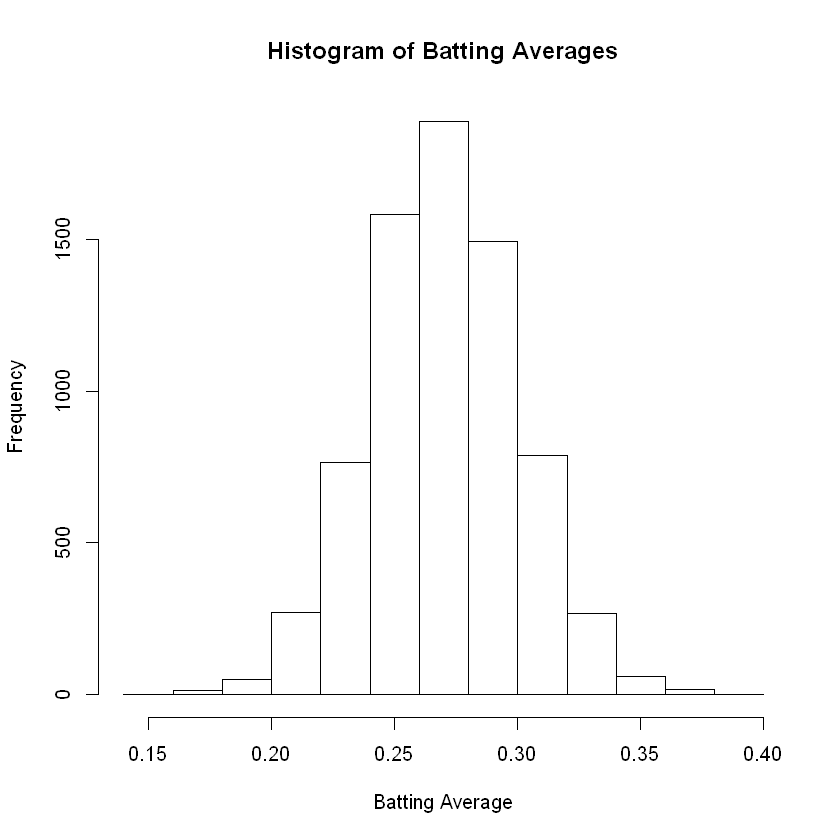

In [9]:
hist(df$BattingAvg,xlab = "Batting Average",ylab = "Frequency", main = "Histogram of Batting Averages")

In [10]:
df_NL = df[which(df$lgID == "NL"), ]   
df_AL = df[which(df$lgID == "AL"), ]   

In [11]:
mu_o = mean(df_AL$BattingAvg)
standard_dev=sd(df_AL$BattingAvg)

In [12]:
print(sum(count(df_NL)$n))
print(sum(count(df_AL)$n))


[1] 3736
[1] 3470


In [14]:
z.test(df_NL$BattingAvg, y = NULL, alternative = "greater", mu = mu_o, stdev=standard_dev) 


	One Sample z-test

data:  df_NL$BattingAvg
z = 1.0428, n = 3.7360e+03, Std. Dev. = 3.0067e-02, Std. Dev. of the
sample mean = 4.9192e-04, p-value = 0.1485
alternative hypothesis: true mean is greater than 0.2697366
95 percent confidence interval:
 0.2694404       Inf
sample estimates:
mean of df_NL$BattingAvg 
               0.2702496 


In [15]:
n <- sum(count(df)$n) 
xbar <- mean(df$BattingAvg) 
s <- sd(df$BattingAvg)
margin <- qt(0.975,df=n-1)*s/sqrt(n)
lowerinterval <- xbar - margin
upperinterval <- xbar + margin


In [16]:
print(lowerinterval)
print(upperinterval)

[1] 0.2693089
[1] 0.2706962
